In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [11]:
df = pd.read_csv("data/k-means.csv", header=None, sep="\t")
df.rename(columns={0 : "x0", 1 : "x1"}, inplace=True)
df.head()

,x0,x1
0,"1,84207953112616","4,60757160448228"
1,"5,65858312061882","4,79996405444154"
2,"6,35257892020234","3,29085449875427"
3,"2,90401652528136","4,61220411281507"
4,"3,23197915720744","4,93989405282630"


In [12]:
# Columns in dataframe are object type so we have to convert them into float

def toFloat(col) : 
    col = col.replace(",", ".")
    return float(col)

df["x0"] = df["x0"].apply(toFloat)
df["x1"] = df["x1"].apply(toFloat)
df.dtypes

x0    float64
x1    float64
dtype: object

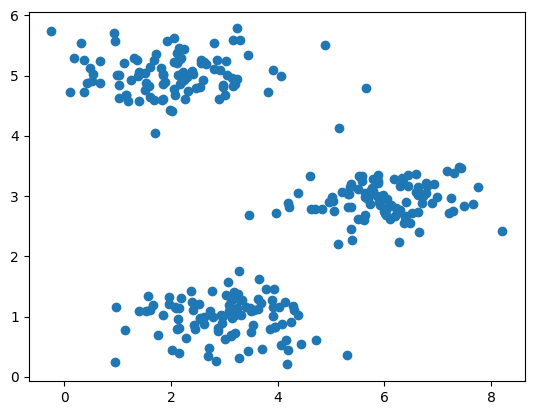

In [13]:
# Visualizing data

plt.scatter(df["x0"], df["x1"])
plt.show()

In [14]:
# In this dataset we can see that there is 3 cluster but we will use elbow method to prove it

In [15]:
class MyKMeans:
    
    def __init__(self, iterations = 30):
        self.KHistory = {}
        self.numberOfIterations = iterations
    
    
    def __euclideanDistance(self, X, Y):
        return np.linalg.norm(X - Y)

    
    def __inertia(self, df, centroids):
        inertia = 0.0
        for element in df.values:
            distances = [self.__euclideanDistance(element, centroid) for centroid in centroids]
            min_distance = min(distances)
            inertia += min_distance ** 2
        return inertia
    
    
    def __getCentroids(self, data, k):
        n_samples, n_features = data.shape
        centroids = np.zeros((k, n_features))

        for i in range(n_features):
            min_val = data.iloc[:, i].min()
            max_val = data.iloc[:, i].max()
            centroids[:, i] = np.random.uniform(min_val, max_val, size=k)

        return centroids
    
    
    def KMeans(self, df, k):
        self.KHistory[k] = {
            "inertia" : None,
            "centroids" : None,
            "history" : {i + 1 : [] for i in range(k)}
        }
        
        centroids = self.__getCentroids(df, k)
        
        for i in range(self.numberOfIterations):
            scaleCentroid = [[] for _ in range(k)]
            
            for element in df.values:
                distances = [self.__euclideanDistance(element, centroids[j]) for j in range(k)]
                idx = np.argmin(distances)
                scaleCentroid[idx].append(element)
            
            for index in range(k):
                if len(scaleCentroid[index]) > 0:
                    centroids[index] = np.mean(scaleCentroid[index], axis=0)
                else:
                    continue
            
            for j in range(k):
                self.KHistory[k]["history"][j+1].append(centroids[j])
            
        
        self.KHistory[k]["centroids"] = centroids.copy()
        self.KHistory[k]["inertia"] = self.__inertia(df, centroids)
        
    
    def fit(self, df, k_values=None):
        if not k_values:
            k_values = range(1, 11)
        
        for k in k_values:
            self.KMeans(df, k)
    
    
    def predict(self, df, k):
        predictions = []
        centroids = self.KHistory[k]["centroids"]
        
        for element in df.values:
            distances = [self.__euclideanDistance(element, centroid) for centroid in centroids]
            idx = np.argmin(distances)
            predictions.append(idx)
        
        return predictions

    
    def elbowMethod(self):
        k_values = [i for i in self.KHistory]
        inertias = [self.KHistory[i]["inertia"] for i in self.KHistory]
        
        plt.figure(figsize=(8, 6))
        plt.plot(k_values, inertias, marker='o')
        plt.xticks(k_values)
        plt.xlabel('Number of Clusters (k)')
        plt.ylabel('Inertia')
        plt.title('Elbow Method for Optimal k')
        plt.show()

In [16]:
myModel = MyKMeans()
myModel.fit(df)

In [17]:
history = myModel.KHistory

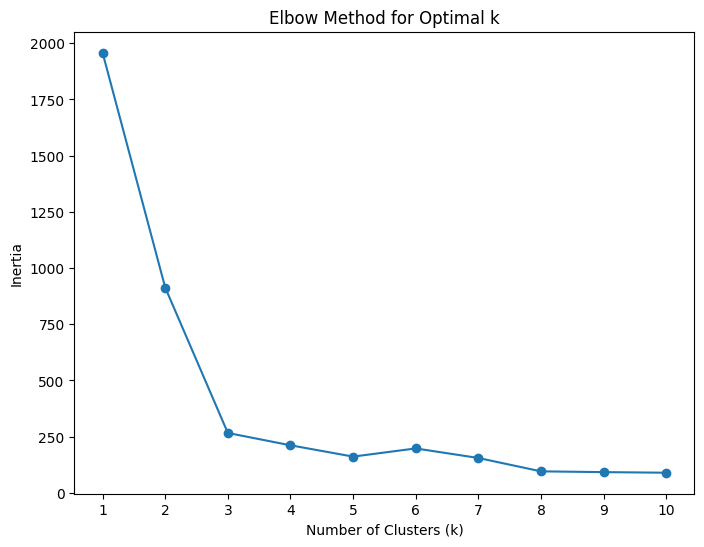

In [18]:
myModel.elbowMethod()

In [19]:
# In this plot we can see that 3 is the ideal number of clusters
centroids = history[3]["centroids"]

In [20]:
myPredictions = myModel.predict(df, 3)
df["predictions"] = myPredictions
df.head()

,x0,x1,predictions
0,1.842080,4.607572,0
1,5.658583,4.799964,2
2,6.352579,3.290854,2
3,2.904017,4.612204,0
4,3.231979,4.939894,0


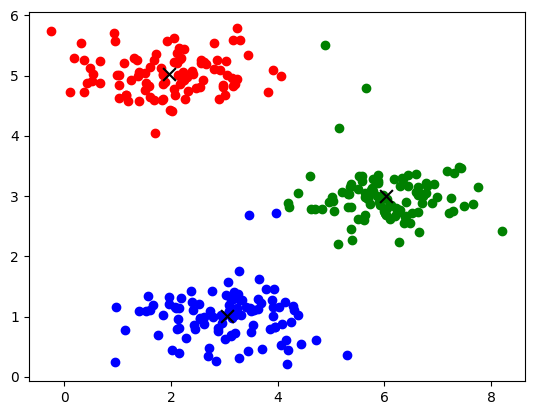

In [21]:
plt.scatter(df[df.predictions == 0]["x0"], df[df.predictions == 0]["x1"], color = "red")
plt.scatter(df[df.predictions == 1]["x0"], df[df.predictions == 1]["x1"], color = "blue")
plt.scatter(df[df.predictions == 2]["x0"], df[df.predictions == 2]["x1"], color = "green")
plt.scatter(centroids[0][0], centroids[0][1], marker="x", color = "black", s = 85)
plt.scatter(centroids[1][0], centroids[1][1], marker="x", color = "black", s = 85)
plt.scatter(centroids[2][0], centroids[2][1], marker="x", color = "black", s = 85)

In [22]:
# We can see that centroids are in the right place